In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [2]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_cat, validation_split=0.2, epochs=5, batch_size=128)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 107ms/step - accuracy: 0.8229 - loss: 0.5986 - val_accuracy: 0.9775 - val_loss: 0.0753
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9745 - loss: 0.0815 - val_accuracy: 0.9847 - val_loss: 0.0510
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.9835 - loss: 0.0515 - val_accuracy: 0.9877 - val_loss: 0.0439
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9877 - loss: 0.0391 - val_accuracy: 0.9877 - val_loss: 0.0427
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9900 - loss: 0.0335 - val_accuracy: 0.9891 - val_loss: 0.0393


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9887 - loss: 0.0365
Test Accuracy: 0.9903


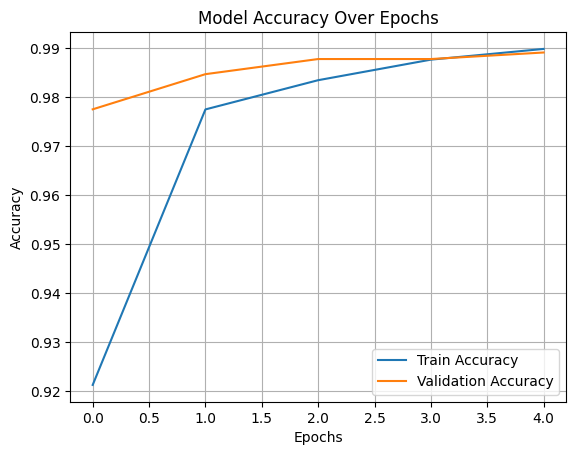

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


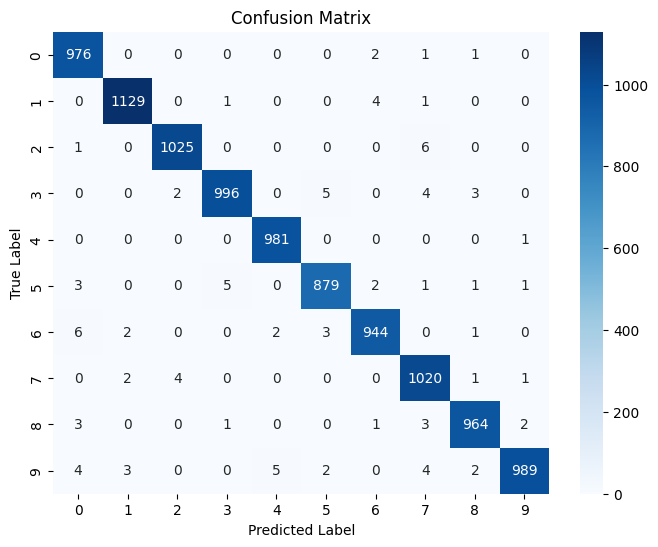


Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving my_digit.png to my_digit.png


In [ ]:
import cv2
from PIL import Image
import io
image = Image.open('my_digit.png').convert('L')
image = image.resize((28, 28))
image_array = np.array(image)
image_array = 225 - image_array
image_array = image_array.astype('float32') / 255.0
image_array = image_array.reshape(1, 28, 28, 1)

In [ ]:
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)
print("Predicted Digit:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
Predicted Digit: 4


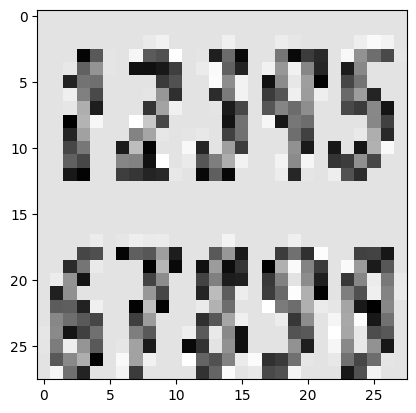

In [ ]:
plt.imshow(image_array.reshape(28, 28), cmap='gray')